# Project1 - getting to know the data

## Information from website
>A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

**sbp**		    systolic blood pressure 
* The highest pressure when your heart beats and pushes the blood round your body

**tobacco**		cumulative tobacco (kg)

**ldl**  		low densiity lipoprotein cholesterol 
* Lipoproteins transfer lipids (fats) around the body in the extracellular fluid thereby facilitating fats to be available and taken up by the cells body wide via receptor-mediated endocytosis.

**adiposity**   (fedme)
The body adiposity index (BAI) is a method of measuring the **amount of body fat in humans**. The BAI is **calculated without using body weight**, unlike the body mass index (BMI). Instead, it uses the size of the hips compared to the person's height.
Based on population studies, the **BAI is approximately equal to the percentage of body fat for adult men and women of differing ethnicities**.[1]

**famhist**		family history of heart disease (Present, Absent)

**typea**		type-A behavior
* Type A and Type B personality theory describes two contrasting personality types. In this theory, personalities that are more competitive, outgoing, ambitious, impatient and/or aggressive are labeled Type A, while more relaxed personalities are labeled Type B.
* The two cardiologists who developed this theory came to believe that Type A personalities had a greater chance of developing coronary heart disease. Following the results of further studies and considerable controversy about the role of the tobacco industry funding of early research in this area, some reject, either partially or completely, the link between Type A personality and coronary disease. Nevertheless, this research had a significant effect on the development of the health psychology field, in which psychologists look at how an individual's mental state affects their physical health

**obesity**
* BMI-measure?

**alcohol**		current alcohol consumption

**age**		    age at onset

**chd**		    response, coronary heart disease


## Preparation of data 

In [2]:
# Getting relevant packages
import xlrd
import pandas as pd
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, hold, plot, title, xlabel, ylabel, legend,
                               colorbar, imshow, xticks, yticks, show, savefig, boxplot)
%matplotlib inline

from pylab import *
from scipy.io import loadmat
from scipy.linalg import svd
from scipy import linalg, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import model_selection, tree
from sklearn import model_selection
from operator import itemgetter
import graphviz
import subprocess
import sklearn.linear_model as lm
from sklearn.mixture import GaussianMixture
from scipy.stats.kde import gaussian_kde
from toolbox_02450 import gausKernelDensity
from sklearn.neighbors import NearestNeighbors
from toolbox_02450 import clusterplot


# Project 1 
Not needed in relation to project 2 - therefore commented out

# Project 2 - Classification

## Get all data information 

In [17]:
# Load xls sheet with data
doc = xlrd.open_workbook('SAheart.xlsx').sheet_by_index(0)
    
# Extract attribute names (1st row, column 2 to 9)
attributeNames = doc.row_values(0, 1, 10)
print(attributeNames)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(9, 1, 463)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

famHist = doc.col_values(5, 1, 463)
famHistDict = dict(zip(famHist, range(len(set(famHist)))))

# Extract vector y, convert to NumPy matrix and transpose
y = np.mat([classDict[value] for value in classLabels]).T

# Preallocate memory, then extract excel data to matrix X
X = np.mat(np.empty((462, 9)))

for i, col_id in enumerate(range(1, 10)):
    if i == 4:
        X[:, i] = np.mat([famHistDict[value] for value in famHist]).T
    else:
        X[:, i] = np.mat(doc.col_values(col_id, 1, 463)).T

# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

# Creating pandas dataframe
X = pd.DataFrame(X)

print(N,M,C)

[u'sbp', u'tobacco', u'ldl', u'adiposity', u'famhist', u'typea', u'obesity', u'alcohol', u'age']
(462, 9, 49)


In [18]:
# Removing obesity
X = X[[0,1,2,3,4,5,7,8]]
X = X.as_matrix()

# Remove obesity for attribute names
del attributeNames[6]

In [19]:
# Subtract mean & standard deviation from data
X = (X - np.ones((N,1))*X.mean(0))/X.std(0)

# NOT NEEDED FOR THIS ASSIGNMENT
# PCA by computing SVD of Y
#U,S,V = svd(X,full_matrices=True)

# Compute variance explained by principal components
#rho = (S*S) / (S*S).sum() 

# Plot variance explained
#figure()
#plot(range(1,len(rho)+1),rho,'o-', color="#647293")
#title('Variance explained by principal components', fontsize=15);
#xlabel('Principal component', fontsize=12);
#ylabel('Variance explained', fontsize=12);
#savefig("variance_explained.png")
#show()


In [11]:
#pd.DataFrame(X)[:10]
print attributeNames, classNames

[u'sbp', u'tobacco', u'ldl', u'adiposity', u'famhist', u'typea', u'alcohol', u'age'] [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0]


## Train data for all cross-validation work
This way all methods will use the same traning and test sets -- this way we can compare the performance 

In [138]:
# Split data - train on 80% test on 20%
test_proportion = 0.2
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=test_proportion)


In [139]:
# Checking values of y
#pd.DataFrame(y)
y_train = np.squeeze(np.asarray(y_train))
y_test  = np.squeeze(np.asarray(y_test))

#### Number of folds in cross validation

In [140]:
# K-fold crossvalidation
K = 10
CV = cross_validation.KFold(N,K,shuffle=True)

In [62]:
# K-fold crossvalidation
K = 200
CV2 = cross_validation.KFold(N,K,shuffle=True)

## K fold two-layer cross-validation 
## Decision tree

Testing the tree size - Hunt's algorithm

+ final tree size

In [66]:
# Entropy and deviance is a measure for the same thing
# Gini and gdi the same
split_crit = ['entropy']

for crit in split_crit:
    # Fit regression tree classifier, Gini split criterion, no pruning
    dtc = tree.DecisionTreeClassifier(criterion=crit, min_samples_split=2, max_depth=5)
    dtc = dtc.fit(X,y)
    # creating filenames for the two visualizations
    filename = "full_tree_"+ crit +".dot"

    # Export tree graph for visualization purposes:
    # (note: you can use i.e. Graphviz application to visualize the file)
    export_graphviz(dtc, out_file=filename, feature_names=attributeNames, filled=True, rounded=True)

    # Saving file png + graphviz object
    with open(filename) as f:
        dot_graph = f.read()
    graphviz.Source(dot_graph)
    # Save to png for report
    #check_call(['dot','-Tpng',filename,'-o',"full_tree_"+ crit + ".png"])

Pruning the decision tree

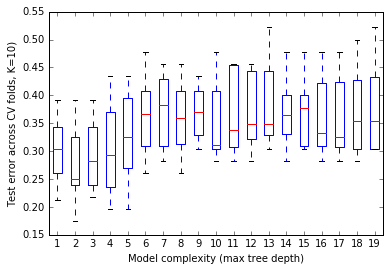

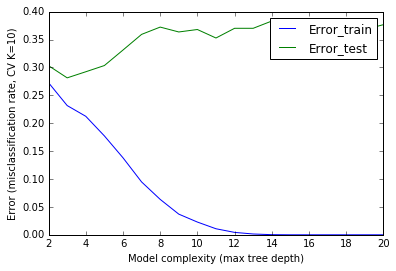

In [67]:
# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# Initialize variable
Error_train = np.empty((len(tc),K))
Error_test  = np.empty((len(tc),K))

k=0
for train_index, test_index in CV:
    #print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test   = X[test_index,:], y[test_index]

    for i, t in enumerate(tc):
        
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        dtc = dtc.fit(X_train, np.squeeze(np.asarray(y_train)))
        
        y_est_test = dtc.predict(X_test)
        y_est_train = dtc.predict(X_train)
        
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test =  sum(np.abs(y_est_test - np.squeeze(np.asarray(y_test)))) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(y_est_train - np.squeeze(np.asarray(y_train)))) / float(len(y_est_train))
        Error_test[i,k]  = misclass_rate_test 
        Error_train[i,k] = misclass_rate_train
        
        knclassifier = KNeighborsClassifier(n_neighbors=l);
        knclassifier.fit(np.squeeze(np.asarray(X_train)), np.squeeze(np.asarray(y_train)));
        y_est = knclassifier.predict(X_test);
        errors[i,l-1] = np.sum(y_est[0]!=y_test[0])
        
    k+=1

#Saving tree
export_graphviz(dtc, out_file="myCVtree_"+ crit + ".dot", feature_names=attributeNames, filled=True, rounded=True)
# Saving file png + graphviz object
with open("myCVtree_"+ crit + ".dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# Save to png for report
#check_call(['dot','-Tpng',"myCVtree_"+ crit + ".dot",'-o',"myCVtree_"+ crit + ".png"])
    
# Plotting
f = figure(); f.hold(True)
boxplot(Error_test.T)
xlabel('Model complexity (max tree depth)')
ylabel('Test error across CV folds, K={0})'.format(K))
f.savefig('misclass_errCV'+str(K)+".png")

f = figure(); f.hold(True)
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])
f.savefig('test_errCV'+str(K)+".png")

show()

## KNN

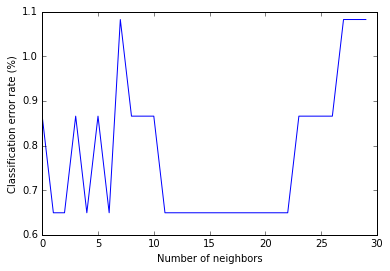

In [83]:
y = np.squeeze(np.asarray(y))
X = np.squeeze(np.asarray(y))
# Maximum number of neighbors
L=30

#CV = cross_validation.LeaveOneOut(N) -- using the k fold cross validation instead
errors = np.zeros((N,L))
i=0
for train_index, test_index in CV:
    #print('Crossvalidation fold: {0}/{1}'.format(i+1,N))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1,L+1):
        knclassifier = KNeighborsClassifier(n_neighbors=l);
        knclassifier.fit(np.squeeze(np.asarray(X_train)), np.squeeze(np.asarray(y_train)));
        y_est = knclassifier.predict(X_test);
        errors[i,l-1] = np.sum(y_est[0]!=y_test[0])

    i+=1
    
# Plot the classification error rate
figure()
plot(100*sum(errors,0)/N)
xlabel('Number of neighbors')
ylabel('Classification error rate (%)')
show()

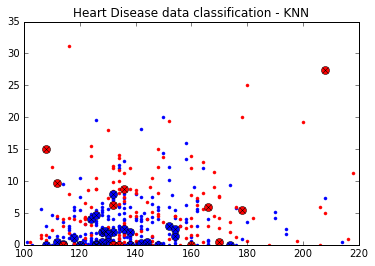

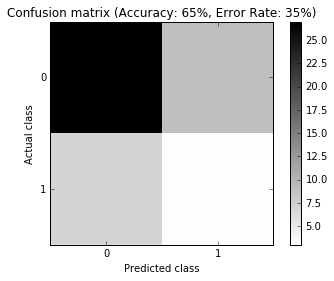

In [109]:
# Plot the training data points (color-coded) and test data points.
figure(1);
hold(True);
styles = ['.b', '.r']
for c in range(C):
    class_mask = (np.squeeze(np.asarray(y_train))==c)
    plot(X_train[class_mask,0], X_train[class_mask,1], styles[c])

# K-nearest neighbors
K=3

# Distance metric (corresponds to 2nd norm, euclidean distance).
dist=2

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(n_neighbors=K, weights='distance', p=dist);
knclassifier.fit(X_train, np.squeeze(np.asarray(y_train)));
y_est = knclassifier.predict(X_test);

# Plot the classfication results
styles = ['ob', 'or']
for c in range(C):
    class_mask = (y_est==c)
    plot(X_test[class_mask,0], X_test[class_mask,1], styles[c], markersize=8)
    plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=6)
title('Heart Disease data classification - KNN');
savefig("knn_plot.png")

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est);
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
figure(2);
imshow(cm, cmap='binary', interpolation='None');
colorbar()
xticks(range(C)); yticks(range(C));
xlabel('Predicted class'); ylabel('Actual class');
title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));
savefig("knn_conf.png")

show()

In [173]:
model.predict_log_proba(X_train)

array([[-1.3887959 , -0.28684961],
       [-0.32146789, -1.29128936],
       [-1.362537  , -0.2957283 ],
       [-1.15942071, -0.37639356],
       [-0.97386539, -0.47420534],
       [-0.21681758, -1.63514972],
       [-0.98708304, -0.46627004],
       [-0.17477787, -1.83035589],
       [-0.91005081, -0.51500731],
       [-0.87921145, -0.53633169],
       [-1.16328838, -0.37463092],
       [-0.04475887, -3.12876165],
       [-0.03180173, -3.46409337],
       [-0.73103128, -0.65664605],
       [-0.19596792, -1.72618866],
       [-1.76099241, -0.18859022],
       [-2.27639899, -0.10831287],
       [-0.52803717, -0.89101643],
       [-0.85111617, -0.5567616 ],
       [-0.29686293, -1.35924695],
       [-1.00241237, -0.45727388],
       [-1.37221473, -0.29241968],
       [-0.86865924, -0.54388897],
       [-1.06658059, -0.42187412],
       [-0.64960253, -0.73867463],
       [-0.20172884, -1.70000025],
       [-1.04650412, -0.4325741 ],
       [-0.37417481, -1.16429277],
       [-0.5771045 ,

## Logistic Regression

Computing CV fold: 1/10..
Computing CV fold: 2/10..
Computing CV fold: 3/10..
Computing CV fold: 4/10..
Computing CV fold: 5/10..
Computing CV fold: 6/10..
Computing CV fold: 7/10..
Computing CV fold: 8/10..
Computing CV fold: 9/10..
Computing CV fold: 10/10..
Error rate: 441.335%


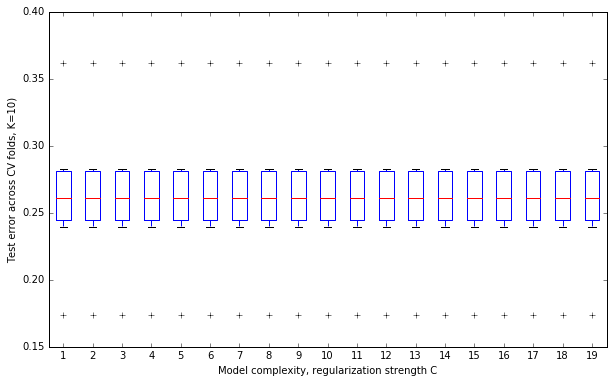

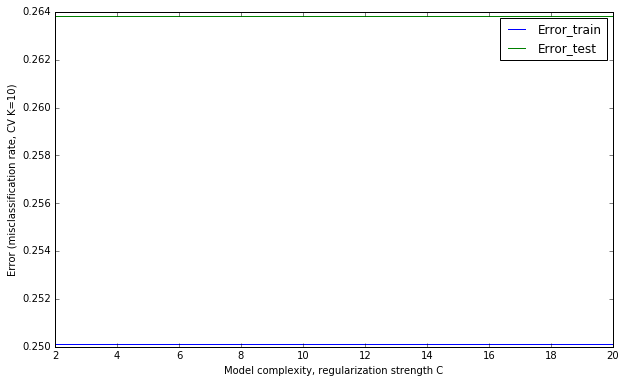

In [167]:
# exercise 6.1.2
Error_logreg = np.empty((K,1))

k=0
for train_index, test_index in CV:
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    for i, t in enumerate(tc):
        # Fit decision tree classifier, logistic regression
        model = lm.logistic.LogisticRegression(C=t+20)
        model = model.fit(X_train, y_train.A.ravel())

        y_est_test = model.predict(X_test)
        y_est_train = model.predict(X_train)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test = sum(np.abs(np.mat(y_est_test).T - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(np.mat(y_est_train).T - y_train)) / float(len(y_est_train))
        Error_test[i,k], Error_train[i,k] = misclass_rate_test, misclass_rate_train
        #y_logreg = np.mat(model.predict(X_test)).T
        #Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)

    k+=1

    
f = figure(figsize=(10,6)); f.hold(True)
boxplot(Error_test.T)
xlabel('Model complexity, regularization strength C')
ylabel('Test error across CV folds, K={0})'.format(K))

f = figure(figsize=(10,6)); f.hold(True)
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity, regularization strength C')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])

print('Error rate: {0}%'.format(np.mean(Error_logreg)))

show()


## Naïve Bayes 

In [163]:
# exercise 6.3.1

# Initialize variables
Error_logreg = np.empty((K,1))
Error_dectree = np.empty((K,1))
n_tested=0

k=0
for train_index, test_index in CV:
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index,:]
    X_test = X[test_index,:]
    y_test = y[test_index,:]

    # Fit and evaluate Logistic Regression classifier
    model = lm.logistic.LogisticRegression(C=N)
    model = model.fit(X_train, y_train.A.ravel())
    y_logreg = np.mat(model.predict(X_test)).T
    Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)
    
    # Fit and evaluate Decision Tree classifier
    model2 = tree.DecisionTreeClassifier()
    model2 = model2.fit(X_train, y_train.A.ravel())
    y_dectree = np.mat(model2.predict(X_test)).T
    Error_dectree[k] = 100*(y_dectree!=y_test).sum().astype(float)/len(y_test)

    k+=1log

# Use T-test to check if classifiers are significantly different
[tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dectree)
if pvalue<=0.05:
    print('Classifiers are significantly different. (p={0})'.format(pvalue[0]))
else:
    print('Classifiers are not significantly different (p={0})'.format(pvalue[0]))        
    
# Boxplot to compare classifier error distributions
figure(figsize=(10,6))
boxplot(np.bmat('Error_logreg, Error_dectree'))
xlabel('Logistic Regression   vs.   Decision Tree')
ylabel('Cross-validation error [%]')

show()

SyntaxError: invalid syntax (<ipython-input-163-e12fa3749ed1>, line 29)

In [85]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes classifier parameters
alpha = 1.0         # additive parameter (e.g. Laplace correction)
est_prior = True   # uniform prior (change to True to estimate prior from data)

errors = np.zeros(K)

K=10
k=0
for train_index, test_index in CV:
    print('Crossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    nb_classifier = MultinomialNB(alpha=alpha, fit_prior=est_prior)
    nb_classifier.fit(X_train, y_train)
    y_est_prob = nb_classifier.predict_proba(X_test)
    y_est = np.argmax(y_est_prob,1)
    
    errors[k] = np.sum(y_est!=y_test,dtype=float)/y_test.shape[0]
    k+=1
    
# Print the classification error rate
print('Error rate: {0}%'.format(100*np.mean(errors)))

Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10
Error rate: 36.1794634598%


## P test for evaluating the models
Test whether the two best performing models are equally good at classifying

In [122]:
len(y)

462

C:\Users\frksteenhoff\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\frksteenhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Classifiers are not significantly different (p=0.0513949071151)


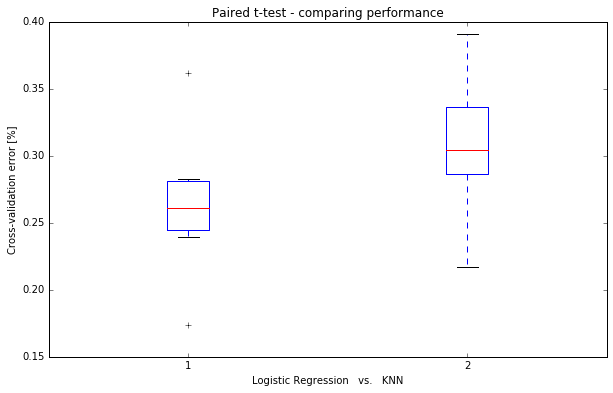

In [141]:
# exercise 6.3.1

# Initialize variables
Error_logreg  = np.empty((K,1))
Error_dectree = np.empty((K,1))
Error_knn     = np.empty((K,1))
n_tested=0

k=0
for train_index, test_index in CV:
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit and evaluate Logistic Regression classifier
    model = lm.logistic.LogisticRegression(C=N)
    model = model.fit(X_train, y_train)
    y_logreg = np.mat(model.predict(X_test)).T
    Error_logreg[k] = (y_logreg!=y_test).sum().astype(float)/len(y_test)
    
    # Fit and evaluate Decision Tree classifier
    #model2 = tree.DecisionTreeClassifier()
    #model2 = model2.fit(X_train, y_train.A.ravel())
    #y_dectree = np.mat(model2.predict(X_test)).T
    #Error_dectree[k] = 100*(y_dectree!=y_test).sum().astype(float)/len(y_test)

    # Fit and evaluate K Nearest Neighbour classifier
    model3 = KNeighborsClassifier(n_neighbors=15, weights='distance');
    model3 = model3.fit(X_train, y_train);
    y_knn = np.mat(model3.predict(X_test)).T;
    Error_knn[k] = (y_knn!=y_test).sum().astype(float)/len(y_test)

    
    k+=1

# Use T-test to check if classifiers are significantly different
[tstatistic, pvalue] = stats.ttest_ind(Error_logreg, Error_knn)
if pvalue<=0.05:
    print('Classifiers are significantly different. (p={0})'.format(pvalue[0]))
else:
    print('Classifiers are not significantly different (p={0})'.format(pvalue[0]))        
    
# Boxplot to compare classifier error distributions
figure(figsize=(10,6))
boxplot(np.bmat('Error_logreg, Error_knn'))
xlabel('Logistic Regression   vs.   KNN')
ylabel('Cross-validation error [%]')
title('Paired t-test - comparing performance')

savefig("t-test.png")

In [153]:
import statsmodels.api as sm
logit = sm.Logit(y_test, X_test)

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.480435
         Iterations 7


In [154]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            7
Date:                Tue, 04 Apr 2017   Pseudo R-squ.:                  0.2822
Time:                        10:01:13   Log-Likelihood:                -22.100
converged:                       True   LL-Null:                       -30.789
                                        LLR p-value:                   0.01511
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.4583      0.419     -1.094      0.274        -1.279     0.363
x2             0.0706      0.519      0.136      0.892        -0.948     1.089
x3            -0.5189      0.435     -1.192      0.233        -1.372     0.334
x4            -0.6395      0.437     -1.464      0.143        -1.496     0.216
x5            -0.3572      0.445     -0.802      0.422        -1.230     0.515
x6             0.9385      0.421      2.231      0.026         0.114     1.763
x7             0.5135      0.497      1.034      0.301        -0.460     1.487
x8             2.2134      0.792      2.795      0.005         0.662     3.765
==============================================================================
"""

----

# Project 3
## Some of the work done by Christian

Rank all observations in terms of 
* Gaussian Kernel density (leave one out):
* KNN density
* KNN average relative density (ARD)

In [5]:
help(clusterplot)

Help on function clusterplot in module toolbox_02450:

clusterplot(X, clusterid, centroids='None', y='None', covars='None')
    CLUSTERPLOT Plots a clustering of a data set as well as the true class
    labels. If data is more than 2-dimensional it should be first projected
    onto the first two principal components. Data objects are plotted as a dot
    with a circle around. The color of the dot indicates the true class,
    and the cicle indicates the cluster index. Optionally, the centroids are
    plotted as filled-star markers, and ellipsoids corresponding to covariance
    matrices (e.g. for gaussian mixture models).
    
    Usage:
    clusterplot(X, clusterid)
    clusterplot(X, clusterid, centroids=c_matrix, y=y_matrix)
    clusterplot(X, clusterid, centroids=c_matrix, y=y_matrix, covars=c_tensor)
    
    Input:
    X           N-by-M data matrix (N data objects with M attributes)
    clusterid   N-by-1 vector of cluster indices
    centroids   K-by-M matrix of cluster centr

In [24]:
#X = np.matrix(X)
#cds
#attributeNames
M

8L

ValueError: shapes (8,8) and (2,100) not aligned: 8 (dim 1) != 2 (dim 0)

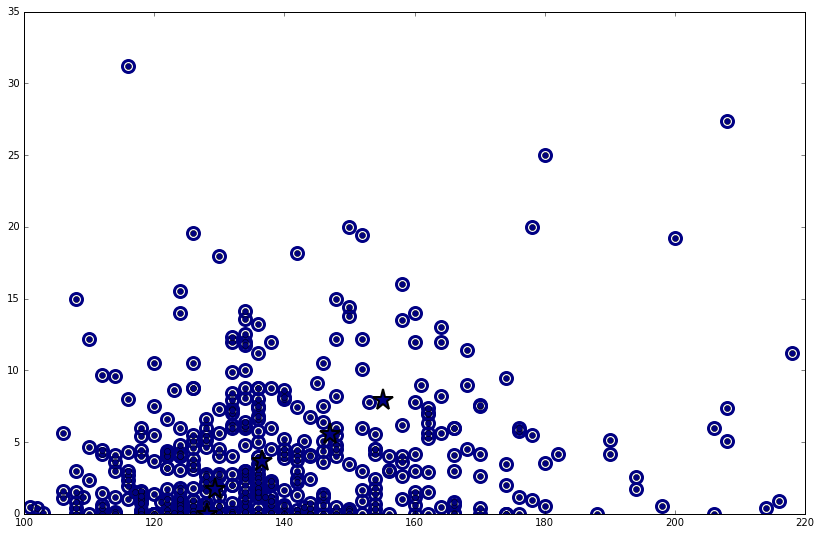

In [27]:
#X = np.matrix(X)
# Gaussian mixture models
N, M = X.shape
C = len(classNames)
# Number of clusters
K = 5
cov_type = 'diag' 
# type of covariance, you can try out 'diag' as wella
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X)
cls = gmm.predict(X)    

# extract cluster labels
cds = gmm.means_        

# extract cluster centroids (means of gaussians)
covs = gmm.covariances_      

# extract cluster shapes (covariances of gaussians)
if cov_type == 'diag':    
    new_covs = np.zeros([K,M,M])    

count = 0    
for elem in covs:        
    temp_m = np.zeros([M,M])        
    for i in range(len(elem)):  
        # Only working on diagonal elements
        temp_m[i][i] = elem[i]        
    
    new_covs[count] = temp_m       
    count += 1    

covs = new_covs
# Plot results:
figure(figsize=(14,9))
clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
show()

In [18]:
#import pandas as pd
#pd.DataFrame(X)
#type(covs)
#print y.shape, X.shape, covs.shape

(462L, 1L) (462L, 8L) (4L, 8L, 8L)


### Gaussian mixture model BIA and AIC

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10


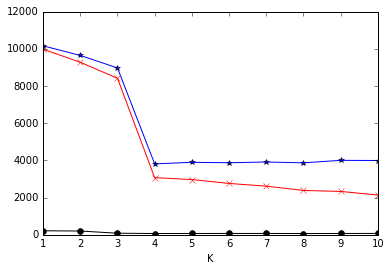

In [17]:
# exercise 11.1.5
from matplotlib.pyplot import figure, plot, legend, xlabel, show
from sklearn import cross_validation
N, M = X.shape
C = len(classNames)

# Range of K's to try
KRange = range(1,11)
T = len(KRange)

covar_type = 'full'     # you can try out 'diag' as well
reps = 3                # number of fits with different initalizations, best result will be kept

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = cross_validation.KFold(N,10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X)

        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV:

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score(X_test).sum()
            

# Plot results
figure(1); 
plot(KRange, BIC,'-*b')
plot(KRange, AIC,'-xr')
plot(KRange, 2*CVE,'-ok')
#axis([0, len(K), 0, 30000])
#legend(['BIC', 'AIC', 'Crossvalidation'])
xlabel('K')
show()

## 

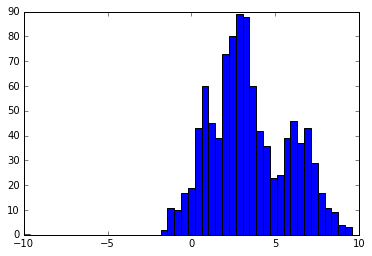

In [10]:
# exercise 11_2_1
# Number of data objects
N = 1000

# Number of attributes
M = 1

# x-values to evaluate the histogram
x = np.linspace(-10, 10, 50)

# Allocate variable for data
X = np.empty((N,M))

# Mean and covariances
m = np.array([1, 3, 6])
s = np.array([1, .5, 2])

# Draw samples from mixture of gaussians
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# Plot histogram of sampled data
figure()
hist(X,x)
show()

## Outlier detection/Anomaly detection

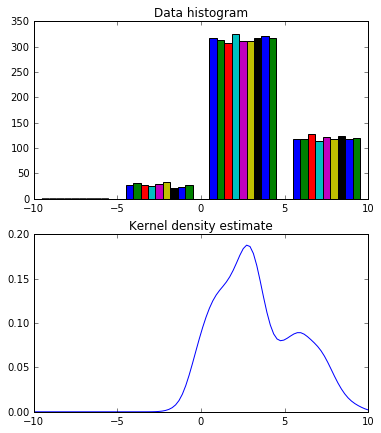

In [35]:
# Kernel Densitty Estimation - Guassian
# exercise 11.2.2

# SHOULD USE 11_3_2 FOR PROJECT
import numpy as np
from matplotlib.pyplot import figure, subplot, hist, title, show, plot
from scipy.stats.kde import gaussian_kde

# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 462
M = 9
x = np.linspace(-10, 10, 5)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# x-values to evaluate the KDE
xe = np.linspace(-10, 10, 100)

# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

# Plot kernel density estimate
figure(figsize=(6,7))
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, kde.evaluate(xe))
title('Kernel density estimate')
show()

In [32]:
help(gaussian_kde)

Help on class gaussian_kde in module scipy.stats.kde:

class gaussian_kde(__builtin__.object)
 |  Representation of a kernel-density estimate using Gaussian kernels.
 |  
 |  Kernel density estimation is a way to estimate the probability density
 |  function (PDF) of a random variable in a non-parametric way.
 |  `gaussian_kde` works for both uni-variate and multi-variate data.   It
 |  includes automatic bandwidth determination.  The estimation works best for
 |  a unimodal distribution; bimodal or multi-modal distributions tend to be
 |  oversmoothed.
 |  
 |  Parameters
 |  ----------
 |  dataset : array_like
 |      Datapoints to estimate from. In case of univariate data this is a 1-D
 |      array, otherwise a 2-D array with shape (# of dims, # of data).
 |  bw_method : str, scalar or callable, optional
 |      The method used to calculate the estimator bandwidth.  This can be
 |      'scott', 'silverman', a scalar constant or a callable.  If a scalar,
 |      this will be used di

Gaussian Kernel Denisty Estimation with leave-one-out

Optimal estimated width is: 1.0
Lowest density: [  3.51006657e-11] for data object: 334


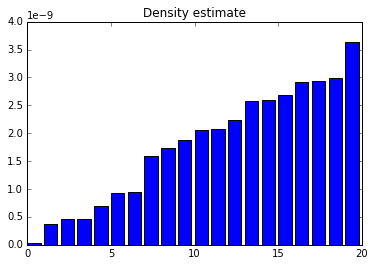

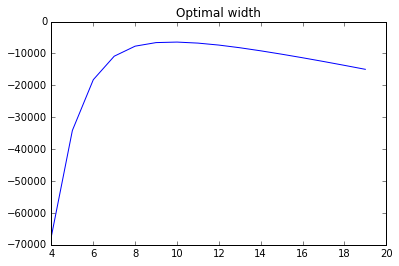

In [84]:
# exercise 11.3.2
# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 462; M = 9
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))

# Estimate the optimal kernel density width, by leave-one-out cross-validation
widths = 2.0**np.arange(-10,10)
logP = np.zeros(np.size(widths))
for i, w in enumerate(widths):
    f, log_f = gausKernelDensity(X, w)
    logP[i] = log_f.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# Estimate density for each observation not including the observation
# itself in the density estimate
density, log_density = gausKernelDensity(X, width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Display the index of the lowest density data object
print('Lowest density: {0} for data object: {1}'.format(density[0],i[0]))

# Plot density estimate of outlier score
figure(1)
bar(range(20),density[:20])
title('Density estimate')
figure(2)
plot(logP)
title('Optimal width')
show()

new = i[:30]

In [83]:
i[:20]

array([419, 359, 335, 410, 367, 460, 391, 433, 450, 300, 384, 392, 308,
       407, 358, 457, 296, 371, 362, 331], dtype=int64)

In [ ]:
### exercise 11.2.3
import numpy as np
from matplotlib.pyplot import figure, subplot, plot, hist, title, show
from sklearn.neighbors import NearestNeighbors


# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 462; M = 9
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# Number of neighbors
K = 200

# x-values to evaluate the KNN
xe = np.linspace(-10, 10, 100)

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(np.matrix(xe).T)

# Compute the density
#D, i = knclassifier.kneighbors(np.matrix(xe).T)
knn_density = 1./(D.sum(axis=1)/K)

# Compute the average relative density
DX, iX = knn.kneighbors(X)
knn_densityX = 1./(DX[:,1:].sum(axis=1)/K)
knn_avg_rel_density = knn_density/(knn_densityX[i[:,1:]].sum(axis=1)/K)


# Plot KNN density
figure(figsize=(6,7))
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, knn_density)
title('KNN density')
# Plot KNN average relative density
figure(figsize=(6,7))
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, knn_avg_rel_density)
title('KNN average relative density')

show()


Optimal estimated width is: 0.706865682842


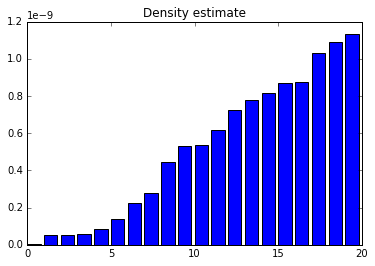

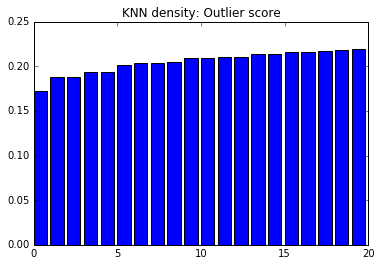

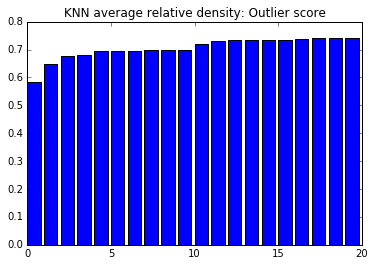

In [86]:
# No restrictions on data

### Gausian Kernel density estimator
# cross-validate kernel width by leave-one-out-cross-validation
# (efficient implementation in gausKernelDensity function)
# evaluate for range of kernel widths
widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))

logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    density, log_density = gausKernelDensity(X,w)
    logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Plot density estimate of outlier score
figure(1)
bar(range(20),density[:20])
title('Density estimate')

# Plot possible outliers
#figure(2)
#for k in range(1,21):
#    subplot(4,5,k)
#    imshow(np.reshape(X[i[k],:], (16,16)).T, cmap=cm.binary)
#  xticks([]); yticks([])
#    if k==3: title('Gaussian Kernel Density: Possible outliers')



### K-neighbors density estimator
# Neighbor to use:
K = 30

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

density = 1./(D.sum(axis=1)/K)

# Sort the scores
i = density.argsort()
density = density[i]

# Plot k-neighbor estimate of outlier score (distances)
figure(2)
bar(range(20),density[:20])
title('KNN density: Outlier score')
# Plot possible outliers
#figure(4)
#for k in range(1,21):
#    subplot(4,5,k)
#    imshow(np.reshape(X[i[k],:], (16,16)).T, cmap=cm.binary)
#    xticks([]); yticks([])
#    if k==3: title('KNN density: Possible outliers')



### K-nearest neigbor average relative density
# Compute the average relative density

knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)
density = 1./(D.sum(axis=1)/K)
avg_rel_density = density/(density[i[:,1:]].sum(axis=1)/K)

# Sort the avg.rel.densities
i_avg_rel = avg_rel_density.argsort()
avg_rel_density = avg_rel_density[i_avg_rel]

# Plot k-neighbor estimate of outlier score (distances)
figure(3)
bar(range(20),avg_rel_density[:20])
title('KNN average relative density: Outlier score')
# Plot possible outliers
#figure(6)
#for k in range(1,21):
#    subplot(4,5,k)
#    imshow(np.reshape(X[i_avg_rel[k],:], (16,16)).T, cmap=cm.binary)
#    xticks([]); yticks([])
#    if k==3: title('KNN average relative density: Possible outliers')



### Distance to 5'th nearest neighbor outlier score
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

# Outlier score
score = D[:,K-1]
# Sort the scores
i = score.argsort()
score = score[i[::-1]]


In [88]:
new2 = sorted(i[:30])
new3 =  sorted(i_avg_rel[:30])

In [95]:
set(new3) & set(new2)

set()

#### new

##### Association Mining

In [20]:
import sklearn.preprocessing as pr
Xx = pr.binarize(X)
Xx = np.mat(Xx)
#WriteAprioriFile(Xx,titles = classLabels)

In [55]:
# MAKE DATA READY FOR APRIORI
temp = ""
for i in range(0,len(Xx)):
    for j in range(0,9):
        temp = temp + str(int(Xx[i,j])) + " "
    temp = temp.strip() + "; "

titles = [u'sbp', u'tobacco', u'ldl', u'adiposity', u'famhist', u'typea', u'alcohol', u'age', u'chd']
WriteAprioriFile(np.mat(temp[:-2]),titles=titles,filename="AprioriForProject2.txt")

### Run Apriori algorithm

In [2]:
from subprocess import call
import re
import numpy as np
import os

filename = 'Data\AprioriForProject2.txt'
minSup = 20
minConf = 70
maxRule = 5

# Run Apriori Algorithm
print('Mining for frequent itemsets by the Apriori algorithm')
status1 = call('Tools/apriori.exe -f"," -s{0} -v"[Sup. %S]" {1} apriori_temp1.txt'.format(minSup, filename))
if status1!=0:
    print('An error occured while calling apriori, a likely cause is that minSup was set to high such that no frequent itemsets were generated or spaces are included in the path to the apriori files.')
    exit()
if minConf>0:
    print('Mining for associations by the Apriori algorithm')
    status2 = call('Tools/apriori.exe -tr -f"," -n{0} -c{1} -s{2} -v"[Conf. %C,Sup. %S]" {3} apriori_temp2.txt'.format(maxRule, minConf, minSup, filename))
    if status2!=0:
        print('An error occured while calling apriori')
        exit()
print('Apriori analysis done, extracting results')


# Extract information from stored files apriori_temp1.txt and apriori_temp2.txt
f = open('apriori_temp1.txt','r')
lines = f.readlines()
f.close()
# Extract Frequent Itemsets
FrequentItemsets = ['']*len(lines)
sup = np.zeros((len(lines),1))
for i,line in enumerate(lines):
    FrequentItemsets[i] = line[0:-1]
    sup[i] = re.findall(' [-+]?\d*\.\d+|\d+]', line)[0][1:-1]
os.remove('apriori_temp1.txt')
    
# Read the file
f = open('apriori_temp2.txt','r')
lines = f.readlines()
f.close()
# Extract Association rules
AssocRules = ['']*len(lines)
conf = np.zeros((len(lines),1))
for i,line in enumerate(lines):
    AssocRules[i] = line[0:-1]
    conf[i] = re.findall(' [-+]?\d*\.\d+|\d+,', line)[0][1:-1]
os.remove('apriori_temp2.txt')    

# sort (FrequentItemsets by support value, AssocRules by confidence value)
AssocRulesSorted = [AssocRules[item] for item in np.argsort(conf,axis=0).ravel()]
AssocRulesSorted.reverse()
FrequentItemsetsSorted = [FrequentItemsets[item] for item in np.argsort(sup,axis=0).ravel()]
FrequentItemsetsSorted.reverse()
    
# Print the results
import time; time.sleep(.5)    
print('\n')
print('RESULTS:\n')
print('Frequent itemsets:')
for i,item in enumerate(FrequentItemsetsSorted):
    print('Item: {0}'.format(item))
print('\n')
print('Association rules:')
for i,item in enumerate(AssocRulesSorted):
    print('Rule: {0}'.format(item))




Mining for frequent itemsets by the Apriori algorithm
Mining for associations by the Apriori algorithm
Apriori analysis done, extracting results


RESULTS:

Frequent itemsets:
Item: tobacco[Sup. 39]
Item: famhist adiposity[Sup. 28]
Item: sbp[Sup. 38]
Item: tobacco adiposity[Sup. 27]
Item: famhist age[Sup. 27]
Item: sbp age[Sup. 27]
Item: chd age[Sup. 26]
Item: typea adiposity[Sup. 26]
Item: sbp adiposity[Sup. 26]
Item: ldl age adiposity[Sup. 25]
Item: chd[Sup. 35]
Item: adiposity[Sup. 55]
Item: age[Sup. 55]
Item: ldl adiposity[Sup. 34]
Item: ldl[Sup. 44]
Item: tobacco age adiposity[Sup. 24]
Item: chd adiposity[Sup. 24]
Item: typea age[Sup. 24]
Item: alcohol[Sup. 33]
Item: ldl typea[Sup. 23]
Item: sbp age adiposity[Sup. 22]
Item: typea[Sup. 51]
Item: ldl famhist[Sup. 21]
Item: sbp famhist[Sup. 21]
Item: tobacco ldl[Sup. 21]
Item: tobacco age[Sup. 31]
Item: age adiposity[Sup. 41]
Item: typea famhist[Sup. 30]
Item: sbp ldl[Sup. 20]
Item: famhist[Sup. 60]
Item: chd ldl[Sup. 20]
Item: alcoh